## Why is Julia fast?

### LLVM 

就像三权分立很早被提出，但直到美国才真正的实行，编译器的三段式架构也是很早被提出，但实际中大多数编译器并没有按照这种方式建立。
![compiler1](pic/compiler1.png)
三段式编译器架构的一个主要有点是灵活性、可配置性，对于不同的环境，可以选用恰当的 frontend （解析程序，检查语法错误）, backend（code generator），而中间的 optimier 可以通用。
![compiler2](pic/compiler2.png)

三段式的架构也同样适用于 interpreter 和 JIT compiler.

直到 LLVM 才真正的落实了三段式的结构。LLVM 原本是缩写 Lower level virtual machine，后来直接成为 project 的 brand，不再是其他词的缩写。

LLVM 的一个特点就是用了 Intermediate Representation (IR)，使得 optimier 不必顾及 frontend, backend，专心做优化工作。

LLVM 中的三段式架构如下：
![compiler3](pic/compiler3.png)

实际上，为了实现灵活配置的架构， LLVM 提供了 a Collection of Libraries，可以实现模块化的建造编译器。

### Just-in-Time compiler

传统的编译器是先将源码转换成机器码，以可执行文件的方式出现。编译过程与程序的运行过程是隔离的。 

JIT 是在是首次运行的时候才编译。运行时编译虽然导致程序的启动速度较慢（因为要先经历编译的过程），但是由于可以与当前系统环境匹配优化，可能得到更好的执行速度。

解释型的语言则没有编译过程，直接一句一句的解释执行，相比来说，解释型的语言启动速度更快，但是整个执行过程比较慢。

Julia 的 JIT compiler 是由 LLVM 搭建的。

### 执行过程
- 首次运行时，程序被解析、判断变量类型
- 由 JIT compiler （基于 LLVM ）转化成 native code
- 第二次运行同样的程序的时候（变量类型应该相同），之前的编译的 native code 被执行。所以第二次运行同样的程序的时候，速度会更快。

## Julia package management

- 从 1.0 版本开始，需要先 using Pkg, 才能使用之前那些 Pkg.* 命令
- 或者更简单的，在 REPL 中输入 `]` 转换成 pkg 模式，然后 add pkg 添加, 用 st 查看已安装的包，用 st --manifest 查看依赖的包
- Julia pkg 的安装都是通过 git，如果 git 被墙，可将 git 协议替换成 https 协议
```
git config --global url.https://github.com/.insteadOf git://github.com/
```

In [1]:
using Pkg

In [2]:
Pkg.installed() # 查看已安装的 Package

Dict{String,Union{Nothing, VersionNumber}} with 5 entries:
  "IJulia"        => v"1.12.0"
  "LinearAlgebra" => nothing
  "Plots"         => v"0.20.3"
  "Example"       => v"0.5.1"
  "Colors"        => v"0.9.4"

In [3]:
Pkg.add("Colors") # 添加 pkg，自动安装依赖的 pkg
Pkg.rm("Colors") # 删除 pkg，自动删除之前安装的依赖的 pkg

  Updating `~/.julia/environments/v1.0/Project.toml`
  [5ae59095] - Colors v0.9.4
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


In [5]:
Pkg.status() # 列出主动安装的 pkg，以及他们的依赖 pkg

    Status `~/.julia/environments/v1.0/Project.toml`
  [7876af07] Example v0.5.1
  [7073ff75] IJulia v1.12.0
  [91a5bcdd] Plots v0.20.3
  [37e2e46d] LinearAlgebra 


In [6]:
Pkg.update() # 更新 pkg

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %Fetching: [======>                                  ]  14.2 %                          ]  33.5 %Fetching: [=====================>                   ]  50.3 %>            ]  69.7 % Resolving package versions...
 Installed Plots ─ v0.20.4
  Updating `~/.julia/environments/v1.0/Project.toml`
  [91a5bcdd] ↑ Plots v0.20.3 ⇒ v0.20.4
  Updating `~/.julia/environments/v1.0/Manifest.toml`
  [91a5bcdd] ↑ Plots v0.20.3 ⇒ v0.20.4
  Building Plots → `~/.julia/packages/Plots/UtVfv/deps/build.log`


In [7]:
Pkg.("RobotOS")

 Resolving package versions...
 Installed MacroTools ─ v0.4.4
 Installed RobotOS ──── v0.6.3
 Installed PyCall ───── v1.18.4
  Updating `~/.julia/environments/v1.0/Project.toml`
  [22415677] + RobotOS v0.6.3
  Updating `~/.julia/environments/v1.0/Manifest.toml`
  [1914dd2f] + MacroTools v0.4.4
  [438e738f] + PyCall v1.18.4
  [22415677] + RobotOS v0.6.3
  Building PyCall → `~/.julia/packages/PyCall/rUul9/deps/build.log`


In [8]:
Pkg.rm("RobotOS")

  Updating `~/.julia/environments/v1.0/Project.toml`
  [22415677] - RobotOS v0.6.3
  Updating `~/.julia/environments/v1.0/Manifest.toml`
  [1914dd2f] - MacroTools v0.4.4
  [438e738f] - PyCall v1.18.4
  [22415677] - RobotOS v0.6.3


## 小技巧

### 在 linux shell 中执行 julia 文件
直接执行即可
```
julia file_name.jl 
```

### 在 Julia 中执行 julia 文件

In [ ]:
include(".jl")

### 在 linux shell 中执行 julia 命令
```
julia -e "a=6*7; println(a)"
```

### short-circuit 判断
`&&` 和 `||` 是 short-circuit 判断方式，只要前一个变量可以确定结果了，后边的就不用看了，哪怕后边的语法错误也没不会报错，因为根本没检查后边的

`&` 和 `|` 不是 short-circuit，需要看全部的变量

`a++` 和 `a--` 在 Julia 中不存在，可以用 `a += 1` 和 `a -= 1`

In [31]:
false && false

false

### 在 Julia 中执行 Linux 命令

In [141]:
pwd()   # 显示当前路径

"/mnt/0002D34F000E55F4/F盘/积累/learning"

In [142]:
cd("path")  # 进入某个 folder

Base.IOError: IOError: chdir path: no such file or directory (ENOENT)

## 调用 PyCall, 使用 Python 的函数

In [12]:
using PyCall

┌ Info: Precompiling PyCall [438e738f-606a-5dbb-bf0a-cddfbfd45ab0]
└ @ Base loading.jl:1186


### 调用一级 module

In [13]:
@pyimport math

In [14]:
math.sin(math.pi/4) - sin(pi/4)

0.0

### 调用次级 module
必须用简写，不能出现 . 的情况

In [15]:
@pyimport numpy.random as nr 

In [16]:
nr.rand(3,4)

3×4 Array{Float64,2}:
 0.200936   0.830696  0.0111664  0.770539  
 0.349352   0.684513  0.247889   0.00258404
 0.0463849  0.998627  0.884151   0.163521  

## Variable and Memory Address

In Julia, `a = 1` implies  that variable `a` is a reference pointing to the momery address storing `1`.

If `b = a`, then both `a` and `b` point to the same address.

If `a = 2`, then `a` points to another address storing `2`. The variable `b` is still pointing to the former address.

So this means, giving a value to `a` is not to store the value to the address `a` is pointing to. 

**这种情况与 Python 是一样的。**


## generic function, method, multiple dispatch

### generic function 与 method

generic function 是一种抽象的操作，method 是该操作对特定 argument type 的具体化。

例如定义函数  

In [14]:
func(x::Int64) = x^2  # generic function with 1 method

func (generic function with 1 method)

如果对于同样的 generic function 但不同的 argument type 再定义一次

In [15]:
func(x::Float64) = 2 * x  # generic function with 2 methods

func (generic function with 2 methods)

### multiple dispatch 

也就是说，对于同一个函数名，不同的 argument type 可以 dispatch (调用，派遣）不同的操作。这就是 **multiple dispatch**. 多调用可以加速程序执行，当一个 generic function 只有一个特定 argument type 的 method时，调用的时候必须给它正确的类型才可以，这样查找、调用速度比较快。这在 python 中是不存在的。

当然也可以像 python 那样，完全不管 type，则查找、调用比较慢，在使用时首先判断是否有明确定义的特定 type method，搜索范围从窄到宽，逐渐放大，直到找到合适的 method.

In [23]:
func(10) #  适用的最贴近的 method是 func(x::Int64) = x^2

100

In [24]:
func(10.0) # 适用的最贴近的 method 是 func(x::Float64) = x*2

20.0

In [18]:
func(x) =  x*10 

func (generic function with 3 methods)

In [22]:
func([1,2,3]) # 最贴近的最贴近的 method 是 func(x) = x*10

3-element Array{Int64,1}:
 10
 20
 30

### 常用命令
#### 多少个 method
要查看一个 generic function 有多少 method, 可以

In [16]:
methods(func)

# 2 methods for generic function "func":
[1] func(x::Float64) in Main at In[15]:1
[2] func(x::Int64) in Main at In[14]:1

#### 当前调用哪个 method

查看当前调用的时候

In [17]:
@which func(5)

func(x::Int64) in Main at In[14]:1

## Module

### Package 与 Module 的关系

- 我们一般用 using, import 都是调用 module
- 我们安装的都是 Package，一个 Package 里面可能有一个或多个相关的 module

### Define a module
```julia
module MyModule
...
end
```

### Call a module
We mainly use *** using *** and ***import*** to call a module. Their difference can be seen in the following example:

***Example:***

I have a module defined like this:
```julia
module MyModule
export x,y
x()="x"
y()="y"
p()="p"
end
```

|Command | What is brough into scope| Method extension|
|:------:| :----| :---:|
|using MyModule| All exported names (x and y), MyModule.x, MyModule.y, MyModule.p |MyModule.x, MyModule.y, MyModule.p|
|using MyModule.x, MyModule.p | x and p|
|using MyModule: x,p | x and p|
|import MyModule| MyModule.x, MyModule.y, MyModule.p| MyModule.x, MyModule.y, MyModule.p|
|import MyModule.x, MyModule.p|x and p| x and p|
|import MyModule: x, p| x and p | x and p |
|importall MyModule| All exported names (x and y)| x and y |


- using 后边可以跟多个 module
- import 后边只能跟一个 module

### Some important modules
***Main***: This is a top-level module, and Julia starts with Main as the current module. Variable defined at the prompt go in Main.

***Core***: Every module implicitly `using Core` which contains all identifiers built in to Julia, i.e., part of the core language and no libraries.

***Base***: Every module implicitly `using Base`, which is the standard library and needed in most cases.

By the way, the command `varinfo()` can check current modules and variables. `varinfo(Module_name)` 可以查看某个 Module 中的内容

In [96]:
varinfo()

| name         |       size | summary                           |
|:------------ | ----------:|:--------------------------------- |
| Base         |            | Module                            |
| Core         |            | Module                            |
| Foo          |  204 bytes | DataType                          |
| Main         |            | Module                            |
| Point        |   40 bytes | UnionAll                          |
| a            |    0 bytes | Symbol                            |
| a1           |   80 bytes | 5-element Array{Float64,1}        |
| d1           |  525 bytes | Dict{String,Any} with 3 entries   |
| d2           |  496 bytes | Dict{String,Int64} with 3 entries |
| foo          |   45 bytes | Foo                               |
| keys_of_dict |  104 bytes | 3-element Array{String,1}         |
| math         |  1.388 KiB | Module                            |
| norm         |    0 bytes | typeof(norm)                      |
| nr           | 15.358 KiB | Module                            |
| p1           |   16 bytes | Point{Float64}                    |
| s1           |  336 bytes | Set{Int64}                        |
| s2           |  336 bytes | Set{Int64}                        |
| startupfile  |   51 bytes | String                            |
| t1           |   42 bytes | Tuple{String,Char,Int64,Float64}  |


## The problem of type in Julia

### polymorphism 多态

- ***static type:*** every program expression including variables must have a type decided before the execution of the program.
- ***dynamic type:*** nothing is known about type until run time when the actual values are available.

The ability to write code that can operate on different types is called ***polymorphism***.

All code in classic dynamically typed languages is polymorphic. Some of statically typed languages allow some flexibility on types. That is also polymorphic.

Julia has polymorphism.

### static types for efficiency.

用 `::` 声明变量或者 argument 的类型。

在定义新变量和定义函数时，尽量指明 type.

The default behavior in Julia when types are omitted is to allow values to be of any type. Thus, a novice can write Julia programs without ever explicitly using and care about types, like that in MATLAB. 

However, introducing explicity type annotations into the code will typically increase both the performance and robustness of the programs, and somewhat counterintuitively, simplify them.

The `::` operator is used for type assertion, and its most common usage is in functions, such as `f(x::Int8)=...`. It declares the variable to always have the specified type.

In [9]:
f(x::Float64) = x ^ 2  # 只能接受 Float64 的 argument，连 Int64 都不行

f (generic function with 2 methods)

In [10]:
f(3)

MethodError: MethodError: no method matching f(::Int64)
Closest candidates are:
  f(!Matched::Float64) at In[9]:1
  f(!Matched::Float32) at In[5]:1

In [100]:
struct NewPoint
    x::Float64
    y::Float64
end

In [102]:
x = NewPoint(1, 2)

NewPoint(1.0, 2.0)

### user defined composite types
- In C, it is called `struct` which has a collection of named fields but no method/function.
- In C++, Java, Python and Ruby these typical object-oriented languages, they also have named functions associated with them, and are called `object`.
- In Julia, objects do not have their own methods, since Julia chooses which method of a function to use by considering all the arguments. Therefore, it would be inappropriate for functions to belong to only one object which may be one of its arguments.


#### 定义新的类型结构
Since composite types in Julia do not have functions inside, like C, the similar keyword `struct` is used  followed by a block of field names, optionally annotated with types using the `::` operator:

*Example: Define a new type called Foo *

In [18]:
struct Foo
    field1
    field2::Int
    field3::Float64
end

where fields with no type annotation default to `Any`,and can accordingly hold any type of value.

#### 使用新的类型结构定义变量
New objects can be created by applying the type like a function to values for its fields:

In [19]:
foo=Foo("Hello, world.", 23, 1.5)  

Foo("Hello, world.", 23, 1.5)

In [22]:
typeof(foo)
# 如果是显示 list 中的 type，可以用 typeof.(list)

Foo

In [25]:
isa(foo, Foo)  # 用 isa 判断某变量是否属于某 type

true

#### function 与 type 中的类型转换问题

- function 中如果设定了具体的变量类型，则严格按照此类型接受 arguments，比如函数中指定为 Float 类型，则连 Int 类型的 arguments 都不能接受。

- composite type 中限制没有这么严格，能保证无损转换就行。

**when a type is applied like a function it is called a constructor.** For each composite type, two constructors are generated automatically, called *default constructors*.
- One accepts any arguments and calls `convert()` to convert them to the types of the fields.
- The other accepts arguments that match the field types exactly.

That is to say, to construct an object, the values inside the constructor either have the exact type as defined initially, or can be converted to the defined type. Therefore, the following object constructing method is wrong:

In [17]:
Foo((), 23.5, 1)

InexactError: InexactError: Int64(Int64, 23.5)

The error above is because a value of type `Float64` (23.5) cannot be converted to type `Int` (baz).

type 转化的原则是不能损失精度，在不损失精度的前提下，可以转化，如下：

In [41]:
println(Float32(12))
println(Float64(13))
println(Int32(12.0))
println(Int32(12.1))  # InexactError. 可以先 round 再转换

12.0
13.0
12


InexactError: InexactError: Int32(Int32, 12.1)

In [42]:
println(Int32(round(12.1)))

12


For a given composite struct, you may find a list of field names using the `fieldnames` function:

In [15]:
fieldnames(Foo)

(:bar, :baz, :qux)

#### 扩充 method
Julia 自带的传统操作可能无法识别新定义的 type，因为没有为这种新的 type 设置 method。

In [2]:
foo1 = Foo("hello", 1, 1.1)
foo2 = Foo("world", 2, 2.2)
foo1 + foo2

MethodError: MethodError: no method matching +(::Foo, ::Foo)
Closest candidates are:
  +(::Any, ::Any, !Matched::Any, !Matched::Any...) at operators.jl:502

添加新 method 的方法如下：

In [3]:
import Base: +
+(x::Foo, y::Foo) = Foo(x.field1 * y.field1, x.field2+y.field2, x.field3+y.field3)

+ (generic function with 164 methods)

In [4]:
foo1 + foo2

Foo("helloworld", 3, 3.3000000000000003)

#### `struct` is immutable

In [6]:
foo = Foo("helloworld", 4, 2.2)
foo.field2 = 3

ErrorException: type Foo is immutable

- An immutable object might contain mutable objects, such as arrays, as fields. 
- Those contained objects will remain mutable 
- Only the fields of the immutable object itself cannot be changed to point to different objects.

####  `mutable struct`  is mutable

In [9]:
mutable struct Bar
    bar
    qux::Float64
end

In [10]:
bar=Bar("Hello", 1.5)

Bar("Hello", 1.5)

In [11]:
bar.qux=2.0

2.0

### tuple 与 array 的区别
- tuple 中元素可以是不同类型的，所以一般看到的是类似这种 Tuple{String,Char,Int64,Float64}
- array 中元素必须是相同的，所以一般看到的是这种 Array{Int64,1}，或者归一化到最高层的相同的 type。其实这样来说，元素可以是不同的，只不过在显示的时候强求一个统一的显示 type
- tuple 元素不可变
- array 元素可变

In [49]:
t1 = ("ab",'a', 11,12.4)

("ab", 'a', 11, 12.4)

In [50]:
typeof(t1)

Tuple{String,Char,Int64,Float64}

In [57]:
a1 = [1,2,3.4,4,5]

5-element Array{Float64,1}:
 1.0
 2.0
 3.4
 4.0
 5.0

In [124]:
a2 = [1,2.2,"hello", true]

4-element Array{Any,1}:
    1       
    2.2     
     "hello"
 true       

### Dict 类型

In [58]:
d1 = Dict("first"=>2, "second"=>"hello", "third"=>4.3)

Dict{String,Any} with 3 entries:
  "second" => "hello"
  "first"  => 2
  "third"  => 4.3

In [59]:
d1["first"] = 3  # 通过 key 查找

3

如果明确知道 type 可以在定义的时候指明

In [64]:
d2 = Dict{String, Int64}("first"=>23, "second"=>83, "thrid"=>193)

Dict{String,Int64} with 3 entries:
  "second" => 83
  "thrid"  => 193
  "first"  => 23

- 取出 dict 中的 keys

In [67]:
collect(keys(d1))  # 可以通过 collect 转化成 array

3-element Array{String,1}:
 "second"
 "first" 
 "third" 

- 取出 values

In [66]:
values(d1)

Base.ValueIterator for a Dict{String,Any} with 3 entries. Values:
  "hello"
  3
  4.3

- 也可以用如下方法取出 key 和 value

In [71]:
keys_of_dict = [key for (key, value) in d1]

3-element Array{String,1}:
 "second"
 "first" 
 "third" 

### Set 类型

In [76]:
s1 = Set([1,2,3,4])
s2 = Set([2,3,4,5,6])

Set([4, 2, 3, 5, 6])

- 关于 set 的基本运算

In [80]:
union(s1, s2)
intersect(s1, s2)

Set([4, 2, 3])

### Compare immutable and mutable objects

- Mutable objects have stable memory addresses. It is like a container that might hold different values over time, and so can only be reliably identified with its address.
- An immutable object is associated with specific field values, i.e., the field values alone tell you everything about the object. 
- An object with an immutable type is passed around by copying , whereas a mutable type is passed around by reference. This is only applied to composite type. Other built-in types like Int64, Float64 are copying and changable. 

**Why forbid modification of fields of objects passed around by copying? **

**Reason:** For example, suppose x is a function argument, and suppose that the function changes a field: `x.isprocessed = true`. If x is passed by reference, then no need to warry about. x.isprocessed is true everywhere in the program. However, if x is passed by copying, then we have two x, one x.isprocessed=true, and the other one may have a different value. This is very like to cause mistake and confusion in the program. 

### type alias 给 type 加个别称

例如如果直接用 Int，则在 32 位机上就相当与 Int32，在 64 位机上就是 Int64

### parametric type 类似 C++ 中的 template

在构造新 composite type 时尽量设定每个 field 的 type，以便提高效率。那么就会设计到可重复利用的问题，明确了每个 field 的 type 之后，如果需要用其他 type 的 field，则需要重新定义一个新的 composite type。 parametric type 就是用来应对这个问题的。  

In [89]:
struct Point{T<:Real}  # 对所有的 Real subtype 都适用
    x::T
    y::T
end

ErrorException: invalid redefinition of constant Point

In [85]:
Point{Float64} <: Point  # 可以把 Point{T} 看成更高的 type，其他具体的 T 都是 subtype

true

In [86]:
p1 = Point{Float64}(1.0, 2.0)

Point{Float64}(1.0, 2.0)

In [88]:
function norm(p::Point{<:Float})  # 定义函数使用于所有 Float 的 subtype
    sqrt(p.x^2 + p.y^2) 
end

norm (generic function with 1 method)

## Julia type tree
![typetree1](pic/julia_typetree1.png)
![typetree2](pic/julia_typetree2.png)
![typetree3](pic/julia_typetree3.png)

### type promotion 与 super type 的区别

- type promotion 是找到一个相同的 type，正确表示多个不同 type 的变量，例如 Int64 为了运算，转成 Float64
- supertype 是沿着 type tree 向上层走的 type。
- 两者没有必然联系，Float64 不是 Int64 的supertype

In [4]:
supertype(Int32)

Signed

In [5]:
subtypes(Real)

4-element Array{Any,1}:
 AbstractFloat     
 AbstractIrrational
 Integer           
 Rational          

### Symbol type

`:` + string 定义了 Symbol type 的变量。一般用作 ID 或 Key.

In [43]:
a = :red  

:red

In [44]:
typeof(a)

Symbol

## function 相关概念

Julia 的 function 中可以不加 return,自然返回最后一个 express 的值，也可以加 return 提前返回

In [132]:
function my_func(x::Int64)
    return x^2
    x^3
end

my_func (generic function with 2 methods)

In [133]:
my_func(3)

9

In [140]:
pwd()

"/mnt/0002D34F000E55F4/F盘/积累/learning"

## 三角函数

- Trigonometric functions with radians
```julia
sin    cos    tan    cot    sec    csc
sinh   cosh   tanh   coth   sech   csch
asin   acos   atan   acot   asec   acsc
asinh  acosh  atanh  acoth  asech  acsch
sinc   cosc   atan2
```

- Trigonometric functions with degrees, just suffix the function with `d`
```julia
sind   cosd   tand   cotd   secd   cscd
asind  acosd  atand  acotd  asecd  acscd
```

## array 以及 向量和矩阵的运算

虽然都是 Array，Julia 中为向量和矩阵专门设计了更简便的类型： Vector{Type} = Array{Type,1}, Matrix{Type} = Array{Type,2}

### 1 维向量的定义

In [108]:
b = [1,2,3,4]  # 一维向量，竖排

4-element Array{Int64,1}:
 1
 2
 3
 4

In [122]:
e = [1,2.2,"ddd"]

3-element Array{Any,1}:
 1     
 2.2   
  "ddd"

In [118]:
b = collect(1:4)  # 用 collect 将 1：4 展开成 1 维向量

4-element Array{Int64,1}:
 1
 2
 3
 4

### 2 维向量的定义

In [109]:
c = [1 2;3 4]  # 空格隔开的是同一行的元素，用分号换行

2×2 Array{Int64,2}:
 1  2
 3  4

In [110]:
a = [1 2 3 4]  # 没有分号，就没有换行，1 行 4 列 的 二维向量

1×4 Array{Int64,2}:
 1  2  3  4

In [112]:
d = [1;2;3;4]  # 这样定义不是 2 维向量，而是 1 维的列向量，感觉 Julia 这样设定有些问题。

4-element Array{Int64,1}:
 1
 2
 3
 4

In [116]:
[1:5;]

5-element Array{Int64,1}:
 1
 2
 3
 4
 5

### 随机矩阵

In [8]:
A = rand(1:4, 3,3) # 从 list 中的元素随机挑选组成 3×3 矩阵

3×3 Array{Int64,2}:
 2  1  1
 3  4  1
 4  2  3

### 转置

In [12]:
A'  # 共轭转置
transpose(A) # 普通的转置

3×3 LinearAlgebra.Transpose{Int64,Array{Int64,2}}:
 2  3  4
 1  4  2
 1  1  3

In [14]:
A'A # 转置相乘可以直接这样写，不用加 *

3×3 Array{Int64,2}:
 29  22  17
 22  21  11
 17  11  11

### 解线性系统

In [37]:
det(A)  # 行列式

0.1717469221260309

In [15]:
x = ones(3)

3-element Array{Float64,1}:
 1.0
 1.0
 1.0

In [17]:
b = A*x

3-element Array{Float64,1}:
 4.0
 8.0
 9.0

In [18]:
A\b

3-element Array{Float64,1}:
 1.0
 1.0
 1.0

如果在上述情况中 A 是个 tall 矩阵，则返回 least square solution.

如果 A 是个 short 矩阵，则返回 minimum norm solution.

### LinearAlgebra package

In [22]:
using LinearAlgebra

In [23]:
A = rand(3, 3)
x = fill(1, (3,))
b = A * x

3-element Array{Float64,1}:
 0.8005818289978142
 1.82368143847143  
 0.9537891269079364

#### LU 矩阵分解

PA = LU

where P is a permutation matrix, L is lower triangular unit diagonal and U is upper triangular.

In [25]:
Alu = lu(A)

LU{Float64,Array{Float64,2}}
L factor:
3×3 Array{Float64,2}:
 1.0       0.0      0.0
 0.582064  1.0      0.0
 0.533281  0.55293  1.0
U factor:
3×3 Array{Float64,2}:
 0.749501  0.0624584   0.14183 
 0.0       0.559641    0.708873
 0.0       0.0        -0.409456

In [35]:
Alu.P
Alu.L
Alu.U

3×3 Array{Float64,2}:
 1.0       0.0      0.0
 0.582064  1.0      0.0
 0.533281  0.55293  1.0

#### QR 矩阵分解

A=QR

where Q is unitary/orthogonal and R is upper triangular

In [38]:
Aqr = qr(A)

LinearAlgebra.QRCompactWY{Float64,Array{Float64,2}}
Q factor:
3×3 LinearAlgebra.QRCompactWYQ{Float64,Array{Float64,2}}:
 -0.418574  -0.290338  -0.860523
 -0.456864  -0.751586   0.475809
 -0.784902   0.592303   0.181949
R factor:
3×3 Array{Float64,2}:
 -0.954897  -0.464779  -0.497232
  0.0       -0.510461  -0.527699
  0.0        0.0        0.352346

In [40]:
Aqr.Q
Aqr.R

3×3 Array{Float64,2}:
 -0.954897  -0.464779  -0.497232
  0.0       -0.510461  -0.527699
  0.0        0.0        0.352346

#### 特征根分解

In [41]:
Asym = A + A'
AsymEig = eigen(Asym)

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
eigenvalues:
3-element Array{Float64,1}:
 -0.3698406674982166
  0.208358978386596 
  2.4365227232292246
eigenvectors:
3×3 Array{Float64,2}:
 -0.423873   0.713059  -0.55846 
 -0.262504  -0.686845  -0.677743
  0.866847   0.140679  -0.478316

In [44]:
AsymEig.values
AsymEig.vectors

3×3 Array{Float64,2}:
 -0.423873   0.713059  -0.55846 
 -0.262504  -0.686845  -0.677743
  0.866847   0.140679  -0.478316

## push!, append!, pop!, unshift!, shift!

### push! 将一个或多个 items 放到 list 后边
注意，这里的流程是多个items作为一个整体放进去，而不是一个一个的。

在这里是看不出来，但是如果从头部插入，就会有区别了

In [1]:
push!([1,2,3],4,5,6)

6-element Array{Int64,1}:
 1
 2
 3
 4
 5
 6

### appdend! 是将一个 list 中的元素全都放入另一个 list 后边

In [3]:
append!([1,2,3],[4,5,6])

6-element Array{Int64,1}:
 1
 2
 3
 4
 5
 6

### pop! 删除 list 中最后一个元素，并返回它

In [9]:
a = [1,2,3,4,5]
b = pop!(a)
println(b)
println(a)

5
[1, 2, 3, 4]


### unshift! 从头部插入元素

In [10]:
unshift!([1,2,3],4,5,6)

6-element Array{Int64,1}:
 4
 5
 6
 1
 2
 3

注意，所以后来的元素是当作一个整体插入头部的，而不是一个一个处理，否则就应该是 6,5,4,1,2,3 了

### shift! 从头部删除元素

In [11]:
a = [1,2,3,4,5,6]

6-element Array{Int64,1}:
 1
 2
 3
 4
 5
 6

In [12]:
shift!(a)

1

In [13]:
a

5-element Array{Int64,1}:
 2
 3
 4
 5
 6

## 如何计时
对一个比较大型的程序，分析其每部分的运行时间，从而有针对性的优化是很有必要的。

Julia 自带了一些计时函数和macro，列举如下：

### @time, @timed, @timev
这三个函数不仅会返回时间，还有内存字节的占用量，以及更多信息

首先定义一个函数，方便我们测试

In [86]:
function test(n)
           A = rand(n, n)
           b = rand(n)
           @time A\b    # @time 会默认打印出后边运算的时间. 另外，A\b 作为 function 的最后一句命令，默认作为函数的返回值
end

test (generic function with 1 method)

In [84]:
test(100);

  0.078077 seconds (8 allocations: 80.047 KiB)


In [49]:
test(1000);   # gc time 是 garbage collect，就是不用的变量空间回收，有时会做一下

  0.128117 seconds (8 allocations: 7.645 MiB, 1.78% gc time)


也可以记录一个 block 的时间，用 begin ... end 定义 block

In [82]:
@time begin 
    test(100)
    test(1000)
    end;  # 加分号，不希望输出返回值

  0.060698 seconds (8 allocations: 80.047 KiB)
  0.053124 seconds (8 allocations: 7.645 MiB)
  0.123065 seconds (633 allocations: 15.450 MiB, 3.41% gc time)


如果希望保存 @time 计算的时间数据，如果直接用 

In [52]:
a = @time 3*3

  0.000004 seconds (4 allocations: 160 bytes)


9

会显示时间，但是返回值还是原来运算式的值。此时可以用 @timed 

In [55]:
a = @timed 3*3

(9, 1.0465e-5, 160, 0.0, Base.GC_Diff(160, 0, 0, 4, 0, 0, 0, 0, 0))

返回一个 tuple，依次为(运算式的值，耗时，字节占用，gc 时间， 更加详细的内容占用信息)

In [57]:
@timed 3*3

(9, 4.137e-6, 160, 0.0, Base.GC_Diff(160, 0, 0, 4, 0, 0, 0, 0, 0))

@timev 是 @time 的 verbose 版本

In [59]:
@timev 3*3

  0.000004 seconds (4 allocations: 160 bytes)
elapsed time (ns): 3933
bytes allocated:   160
pool allocs:       4


9

### @elapsed
只返回计时结果，不管运算式子的结果

In [61]:
a = @elapsed 3*3

1.0672e-5

### tic() ... toc(), tic()...toq(),  time_ns()
除了上述 Julia 特有的计时 macro，还有模拟其他语言的计时函数如：

- 与 MATLAB 类似的，tic()... toc() 函数

In [69]:
tic()
test(100)
toc()

  0.064512 seconds (8 allocations: 80.047 KiB)
elapsed time: 0.065203805 seconds


0.065203805

- tic()...toq() 中用 toq() 替换了 toc()，只返回，不打印

In [71]:
tic()
test(100)
toq()  

  0.091070 seconds (8 allocations: 80.047 KiB)


0.091852916

- 与 Python 中的 time.time() 对应的 time_ns()

## DataFrames.jl

In [1]:
using DataFrames

INFO: Recompiling stale cache file /home/av/.julia/lib/v0.6/StatsBase.ji for module StatsBase.
INFO: Recompiling stale cache file /home/av/.julia/lib/v0.6/DataFrames.ji for module DataFrames.


#### Missing Type

Missing is a type implemented by the `Missings.jl`(installed along with `DataFrames.jl`), which is used to represent missing values in data. 

Simply typing in `missing` in the place. 

For example,

In [5]:
x = [1, 2, missing]

3-element Array{Union{Int64, Missings.Missing},1}:
 1       
 2       
  missing

#### skipmissing

If we want to do operation over data containing missing, such as `sum` and `collect`, just use `skipmissing`.

For example,

In [8]:
x = [1, 2, missing]
sum(skipmissing(x))

3

In [10]:
collect(skipmissing(x))

2-element Array{Int64,1}:
 1
 2

#### Missings.replace

If we want to replace the missing value by another value, just use `replace` function from the `Missings` package.

For example,

In [12]:
sum(Missings.replace(x, 10))  

13

In [16]:
collect(Missings.replace(x, 10))

3-element Array{Int64,1}:
  1
  2
 10

#### missings

If we want to generate a vector supporting missing values, just use `missings(dim)` or `missings(type, dim)` to specify the element-type.

For example,

In [17]:
missings(3)

3-element Array{Missings.Missing,1}:
 missing
 missing
 missing

In [18]:
missings(2,3)

2×3 Array{Missings.Missing,2}:
 missing  missing  missing
 missing  missing  missing

In [19]:
missings(Int, 2, 3)

2×3 Array{Union{Int64, Missings.Missing},2}:
 missing  missing  missing
 missing  missing  missing

#### DataFrame

The DataFrame type can be used to represent data tables, each column of which is a vector.

In [20]:
using DataFrames

In [22]:
dt = DataFrame(A=1:4, B=["M", "F", "M", "F"])

4×2 DataFrames.DataFrame
│ Row │ A │ B │
├─────┼───┼───┤
│ 1   │ 1 │ M │
│ 2   │ 2 │ F │
│ 3   │ 3 │ M │
│ 4   │ 4 │ F │

In [26]:
# add more column 

dt[:C] = ["first", "second", "third", "fourth"]
dt

4×3 DataFrames.DataFrame
│ Row │ A │ B │ C      │
├─────┼───┼───┼────────┤
│ 1   │ 1 │ M │ first  │
│ 2   │ 2 │ F │ second │
│ 3   │ 3 │ M │ third  │
│ 4   │ 4 │ F │ fourth │

In [36]:
# size of dt. Eventhough in DataFrame type, dt is very similiar to a matrix
size(dt)

(4, 3)

In [33]:
# just show the first 6 rows

dt1 = DataFrame()
dt1[:A] = 1:10
dt1[:B] = ["first", "second", "third", "fourth", "fifth", "sixth", "seventh", "eighth", "ninth", "tenth"]
head(dt1)

6×2 DataFrames.DataFrame
│ Row │ A │ B      │
├─────┼───┼────────┤
│ 1   │ 1 │ first  │
│ 2   │ 2 │ second │
│ 3   │ 3 │ third  │
│ 4   │ 4 │ fourth │
│ 5   │ 5 │ fifth  │
│ 6   │ 6 │ sixth  │

In [34]:
# show the last 6 rows
tail(dt1)

6×2 DataFrames.DataFrame
│ Row │ A  │ B       │
├─────┼────┼─────────┤
│ 1   │ 5  │ fifth   │
│ 2   │ 6  │ sixth   │
│ 3   │ 7  │ seventh │
│ 4   │ 8  │ eighth  │
│ 5   │ 9  │ ninth   │
│ 6   │ 10 │ tenth   │

In [37]:
# show part of the data
dt1[1:3, :]

3×2 DataFrames.DataFrame
│ Row │ A │ B      │
├─────┼───┼────────┤
│ 1   │ 1 │ first  │
│ 2   │ 2 │ second │
│ 3   │ 3 │ third  │

In [39]:
# the properties of dt1, for each column
describe(dt1)

A
Summary Stats:
Mean:           5.500000
Minimum:        1.000000
1st Quartile:   3.250000
Median:         5.500000
3rd Quartile:   7.750000
Maximum:        10.000000
Length:         10
Type:           Int64

B
Summary Stats:
Length:         10
Type:           String
Number Unique:  10



In [40]:
# To access columns of the data, use symbol or the index
dt1[:A] == dt1[1]

true

In [42]:
typeof(dt1[:B])

Array{String,1}

## CSV.jl

In [43]:
using CSV

INFO: Recompiling stale cache file /home/av/.julia/lib/v0.6/CSV.ji for module CSV.


In [1]:
# dt3 = CSV.read("filename")
# CSV.write("filename", dt3)

## RobotOS.jl 
与 c++ 和 python 类似，当用 julia 写 ros node 的时候，也需要将 ros 的数据类型导入到 julia 程序文件中，成为 julia 可以操作的 type。RobotOS.jl 就可以实现该功能。

目前，julia 还不能处理 rosbag，还是需要通过 pycall 调用 python 处理 rosbag 

### 安装与调用  RobotOS.jl 
- 安装： 在 Julia 中
```julia
Pkg.add("RobotOS")
```

- 调用： 在写 node 文件时，首先要调用 RobotOS
```julia
using RobotOS
```

### 导入 ros 数据类型并生成 julia 的数据类型
1. 用 @rosimport macro 导入一个 ros package 和 若干个 type，有如下3种方式：
```julia
@rosimport std_msgs.msg.Header
@rosimport nav_msgs.srv: GetPlan
@rosimport geometry_msgs.msg: PoseStamped, Vector3
```
注意：必须至少有一个 type，不能只有 package

2. @rosimport 是导入了指定类型的 python module 及其依赖的 module，要生成 julia 自身的 type，还需要下面的命令：
```julia
rostypegen()
```

3. 此时生成了julia 的 module，例如 `std_msgs` 生成 julia module `std_msgs.msg`，如果想使用这些 module，就用 julia 自身的 `using` 和 `import` 命令调用
```julia
using nav_msgs.msg   # 调用 nav_msgs.msg module
import geometry_msgs.msg: Pose, Vector3  # 调用 geometry_msgs.msg module 中的 Pose, Vector3 类型
```
然后就可以进行 Julia 内部的操作了，例如
```julia
p = Pose()
v = Vector3(1.1,2.2,3.3)
```

注意：在从 ROS 类型往 julia 类型转换时，转化之后的 ROS 类型恰好跟 julia 内置类型相同，例如 
- `std_msgs/Float64` 
- `std_msgs/String`

转换之后类型是 Float64, String, 可是 julia 自身就有这种数据类型。所以为了区分，这些有冲突的类型转换之后都要在后边加上 "Msg"，例如
- `std_msgs.msg.Float64Msg` 
- `std_msgs.msg.StringMsg`

**注意：** 
- If `PoseStamped` type is `rosimport`, then all types appearing in the fields of `PoseStamped` can be used later, such as `Pose`, `Point`, 因为他们是 dependency ，会自动引入的. However, other types (even also in the package `geometry_msgs.msg`) could not be used, such as `Vector`, `TwistStamped`.
- 用 using geometry_msgs.msg 可以将刚才 rosimport 的东西都调用起来，但是用 import geometry_msgs.msg: Type 则只能用 import 的这个 Type，想用其他被 rosimport 引入的 Type 必须用全缀
- 实际上在 rostypegen() 之后就已经可以用 ros 的 type 了，但是要用全缀 geometry_msgs.msg... 如果用 using 和 import 则可以省去前缀

### 基本用法和框架

#### 总体印象
总的来说，julia 中编写 node 的语句与 python 几乎一样。在 python 中，经常用 rospy.×××, 在 julia 中大部分语句只要去掉 rospy 就可以了。例如 
- python 中的 rospy.init_node()
- 在 julia 中是 init_node()

类似的还有

- is_shutdown() : Check for ROS shutdown state.
- spin() : Wait for callbacks until shutdown happens.
- logdebug,loginfo,logwarn,logerr,logfatal all work as in rospy.

#### Time 相关有细微差别
与 python 中相同，julia 中也是有两种时间类型 Time 和 Duration，结构跟 python 中一样：
```
int32 secs
int32 nsecs
```
- 获取当前时间：
  - get_rostime()
  - RobotOS.now()
- ros 转换成普通类型
  - to_sec(time_obj)  # float
  - to_nsec(time_obj) # int
  - convert(Float64, time_obj)
- sleep
  - rossleep(t) with t of type Duration, Rate, Real
  - sleep(t::Duration) 
  - sleep(t::Rate) 

#### publish
```julia
using geometry_msgs.msg
pub = Publisher("topic", PointStamped, queue_size = 10)  # 这种形式是与 python 中相同的
#pub = Publisher{PointStamped}("topic", queue_size = 10)  # 也可以，后一种形式的好处是更容易看出 pub 的数据类型是 Publisher{PointStamped}
msg = PointStamped()
msg.header.stamp = now() # 这个 now() 是 julia 自带的函数，似乎ros 中应该用 RobotOS.now()
msg.point.x = 1.1
publish(pub, msg)  # 在 python 中是 pub.publish(msg)，由于 julia 中没有 method 的概念，所以只能把写成函数的形式
```

#### subscribe
基本与 python 相同，一个特殊的地方是调用 callback 函数时可以传送参数，但必须以 tuple 的形式，哪怕只有一个参数
```julia
using sensor_msgs.msg
cb1(msg::Imu, a::String) = println(a,": ",msg.linear_acceleration.x) # callback 函数第一个参数还是数据，后边可以跟其他参数
cb2(msg::Imu) = println(msg.angular_velocity.z)
sub1 = Subscriber("topic", Imu, cb1, ("accel",), queue_size = 10) # 这种形式有 python 中相同
#sub1 = Subscriber{Imu}("topic", cb1, ("accel",), queue_size = 10) 
sub2 = Subscriber{Imu}("topic", cb2, queue_size = 10)
spin()  # spin() 的作用跟 python 中一样，还是保证程序不退出
```

#### param 设定与获取与 python 相同
- get_param
- set_param
- has_param
- delete_param 

are all implemented in the RobotOS module with the same syntax as in rospy.

### 完整程序例子
This example demonstrates publishing a random geometry_msgs/Point message at 5 Hz. It also listens for incoming geometry_msgs/Pose2D messages and republishes them as Points.

```julia
#!/usr/bin/env julia

using RobotOS  # 首先一定要调用 RobotOS，否则后边的 @rosimport 回报错
@rosimport geometry_msgs.msg: Point, Pose2D
rostypegen()
using geometry_msgs.msg

function callback(msg::Pose2D, pub_obj::Publisher{Point}) # 尽量指明数据类型
    pt_msg = Point(msg.x, msg.y, 0.0)
    publish(pub_obj, pt_msg)
end

function loop(pub_obj)
    loop_rate = Rate(5.0)
    while ! is_shutdown()
        npt = Point(rand(), rand(), 0.0)
        publish(pub_obj, npt)
        rossleep(loop_rate)
    end
end

function main()
    init_node("rosjl_example")
    pub = Publisher{Point}("pts", queue_size=10)
    sub = Subscriber{Pose2D}("pose", callback, (pub,), queue_size=10)
    loop(pub)  # 此处 loop 是一个自定义函数
end

if ! isinteractive()
    main()
end
```

## JuMP.jl
Julia for Mathematical Optimization

### Creating a model
首先是调用 JuMP 中的 Model() type，一般此时会指定 solver，例如
```julia
m = Model(solver=IpoptSolver())
```


### Defining variables
用 @variable macro 的形式定义变量，而且定义时第一个参数必须是变量所属的 mode，常见形式如下：
```julia
@variable(m, x )              # No bounds
@variable(m, x >= lb )        # Lower bound only (note: 'lb <= x' is not valid)
@variable(m, x <= ub )        # Upper bound only
@variable(m, lb <= x <= ub )  # Lower and upper bounds
```
也可以定义变量向量和矩阵，如
```julia
@variable(m, x[1:M,1:N] >= 0 )  # 当前版本只支持首个下标为明确的数字，而不能是 variable
```

###  Constraints and Objective
用 @constraint 和 @objective 形式，如
```julia
@constraint(m, x[i] - s[i] <= 0)  # Other options: == and >=
@constraint(m, sum(x[i] for i=1:numLocation) == 1)  
# 注意这种表示累加和的形式，sum(expression for i = I1, j = I2 if cond) 会经常用到，还有 prod()
@objective(m, Max, 5x + 22y + (x+y)/2) # or Min. 第一个参数还是 model name, 第二个必须是 Max 或 Min
```



### 简单例子

In [1]:
using JuMP, Ipopt

In [3]:
m = Model(solver=IpoptSolver())

Feasibility problem with:
 * 0 linear constraints
 * 0 variables
Solver is Ipopt

In [4]:
@variable(m, 0 <= x <= 2 )
@variable(m, 0 <= y <= 30 )

y

In [5]:
@objective(m, Max, 5x + 3*y )

5 x + 3 y

In [6]:
@constraint(m, 1x + 5y <= 3.0 )

x + 5 y ≤ 3

In [8]:
print(m)  # 用易读的方式呈现出来

Max 5 x + 3 y
Subject to
 x + 5 y ≤ 3
 0 ≤ x ≤ 2
 0 ≤ y ≤ 30


In [11]:
status = solve(m)  # 可以保存 solve 的返回值，反映优化结果是否顺利完成

This is Ipopt version 3.12.8, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        2
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        2
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        1
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        1

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -

:Optimal

In [12]:
println("Objective value: ", getobjectivevalue(m))  # getobjectivevalue(m)  返回目标函数的最优值

Objective value: 10.600000100982928


In [14]:
println("x = ", getvalue(x))  # 返回优化变量的最优值
println("y = ", getvalue(y))

x = 2.0
y = 0.2000000012767097


### 如何改动已创建的优化模型
It can be useful to modify models after they have been created and solved, for example when we are solving many similar models in succession or generating the model dynamically 

改动已创建模型是需要 solver 支持的

Some solvers do not expose the ability to modify a model after creation - the model must be constructed from scratch each time. JuMP will use the ability to modify problems exposed by the solver if possible, and will still work even if the solver does not support this functionality by passing the complete problem to the solver every time.

#### 添加新的变量

In [39]:
m = Model(solver=IpoptSolver())

Feasibility problem with:
 * 0 linear constraints
 * 0 variables
Solver is Ipopt

In [40]:
@variable(m, 0 <= x <= 1)
@variable(m, 0 <= y <= 1)
@objective(m, Max, 5x + 1y)
@constraint(m, con, x + y <= 1)  # 其中 con 是该约束的标签，方便后边有针对性的修改
solve(m)  # x = 1, y = 0

This is Ipopt version 3.12.8, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        2
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        2
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        1
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        1

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -

:Optimal

In [41]:
print(m)

Max 5 x + y
Subject to
 x + y ≤ 1
 0 ≤ x ≤ 1
 0 ≤ y ≤ 1


In [42]:
println(getobjectivevalue(m))
println(getvalue(x))
println(getvalue(y))

5.000000045690615
1.0
0.0


In [43]:
@variable(m, 0 <= z <= 1, objective = 10.0, inconstraints = [con], coefficients = [1.0])
# objective 指明在该变量在目标函数中的系数
# inconstraints=[con] 指明将新的变量放入哪个约束中
# coefficients 指明该变量在约束中的系数
# The constraint is now x + y + z <= 1
# The objective is now 5x + 1y + 10z
solve(m)  # z = 1

This is Ipopt version 3.12.8, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        3
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:        3
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        3
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        1
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        1

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -

:Optimal

In [44]:
print(m)

Max 5 x + y + 10 z
Subject to
 x + y + z ≤ 1
 0 ≤ x ≤ 1
 0 ≤ y ≤ 1
 0 ≤ z ≤ 1


In [45]:
println(getobjectivevalue(m))
println(getvalue(x))
println(getvalue(y))
println(getvalue(z))

10.000000133055062
9.645886704925855e-9
0.0
1.0


知道了如何添加变量，其实我们可以把所有变量以添加的形式放入空的优化模型

In [50]:
m = Model(solver=IpoptSolver())
@constraint(m, con, 0 <= 1)
@objective(m, Max, 0)
@variable(m, 0 <= x <= 1, objective = 5, inconstraints = [con], coefficients = [1.0])
@variable(m, 0 <= y <= 1, objective = 1, inconstraints = [con], coefficients = [1.0])
@variable(m, 0 <= z <= 1, objective = 10, inconstraints = [con], coefficients = [1.0])
solve(m)
println()
println(m)
println(getobjectivevalue(m))
println(getvalue(x))
println(getvalue(y))
println(getvalue(z))

This is Ipopt version 3.12.8, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        3
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:        3
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        3
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        1
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        1

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -

#### 修改线性约束
目前，JuMP 不允许修改约束中变量的系数，但是可以修改约束公式一边的常系数，例如

In [54]:
m = Model(solver=IpoptSolver())
@variable(m, 0 <= x <= 1)
@variable(m, 0 <= y <= 1)
@objective(m, Max, 5x + 1y)
@constraint(m, mycon, x + y <= 1)
solve(m)

println(m)
println(getobjectivevalue(m))
println(getvalue(x))
println(getvalue(y))

This is Ipopt version 3.12.8, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        2
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        2
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        1
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        1

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -

In [56]:
JuMP.setRHS(mycon, 1.5)  # Now x + y <= 1.5
solve(m)  # Hot-start for LPs

println(m)
println(getobjectivevalue(m))
println(getvalue(x))
println(getvalue(y))

This is Ipopt version 3.12.8, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        2
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        2
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        1
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        1

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -

#### 修改目标函数
只需要用 @objective 重新定义即可

## Plots.jl

### basic: plot a line

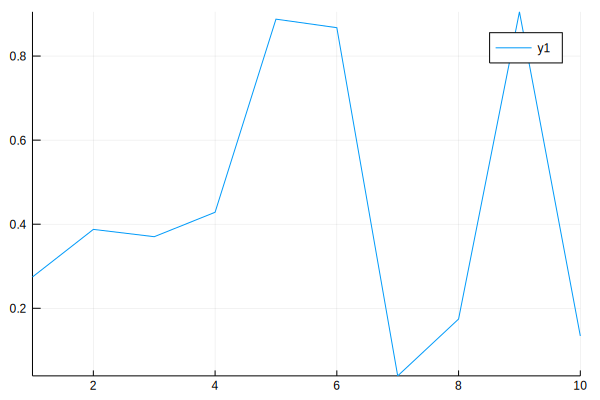

In [2]:
using Plots
x = 1:10; 
y = rand(10); 
plot(x,y)

矩阵中的每一列都可以看作是一个向量，因此如果画二维矩阵，就是相当于针对两列画了两条线

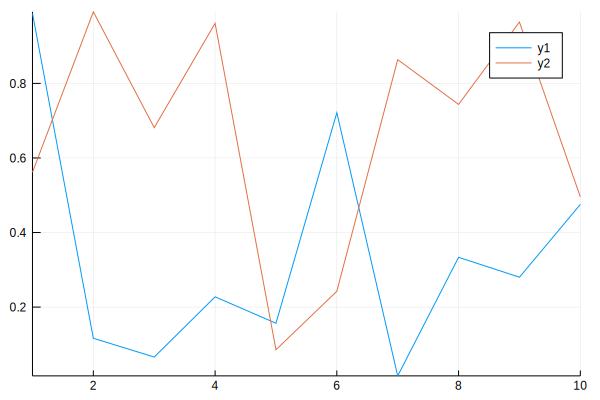

In [3]:
x = 1:10; 
y = rand(10,2) # 2 columns means two lines
plot(x,y)

### 在现有图上添加 plot!()

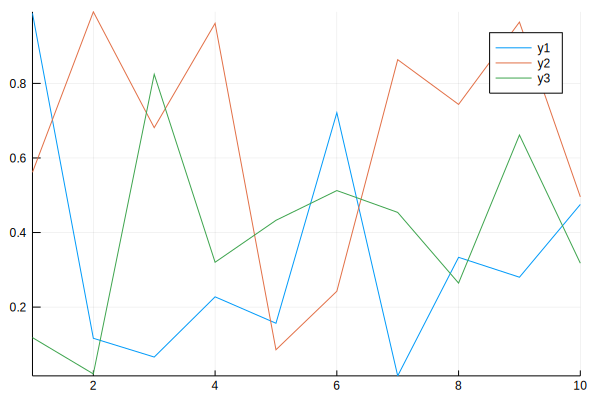

In [4]:
z = rand(10)
plot!(z)

上述命令中并没有指定往哪个图上添加新曲线，默认是最后一次画的图。也可以特别指定往哪个图上添加。

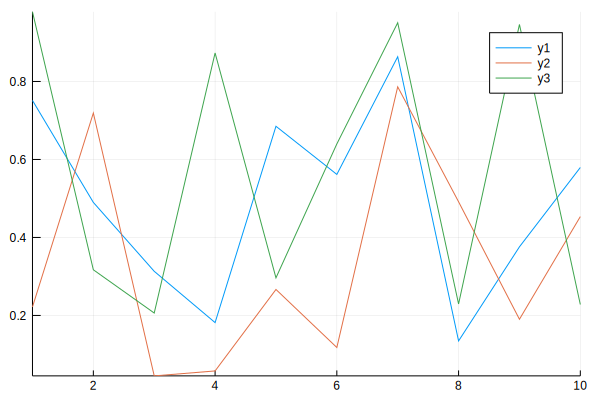

In [7]:
x = 1:10; y = rand(10,2) 
p = plot(x,y)  # 将画的图赋给某个变量，方便后边调用
z = rand(10)
plot!(p,x,z) # or plot!(p,z)

### 为图添加 attributes

一般格式为 plot(x,y, attribute = value)

Plots 可以区分哪部分参数是数据，哪部分参数是attribute

#### 对于 axis 的修饰

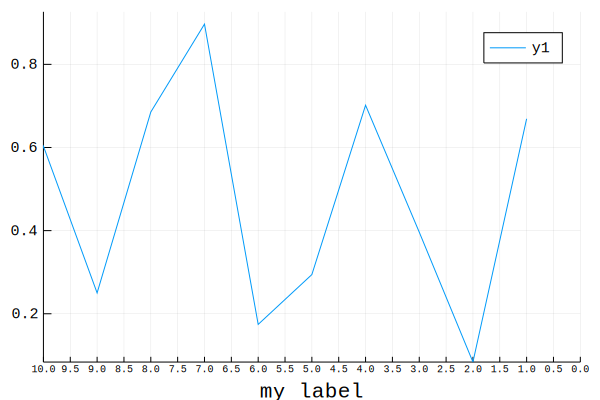

In [16]:
y = rand(20)  
plot(y, xlabel = "my label", # x 轴标题
        xlims = (0,10),  # x 轴范围
        xticks = 0:0.5:10, # x 轴刻度间隔
        #xscale = :log10, # 可以设定 x 轴线性或对数
        xflip = true, # 刻度反转
        xtickfont = font(6, "Courier"))  # 刻度字体设置
# 上述对 x 轴的修饰，对 y 轴同样适用

#### 对于 line 的修改

In [1]:
y = rand(10)
plot(y, seriestype = :steppre,  # 默认是斜线连接，此处设置为间隔中保持值不变
        linestyle = :dot,  # 线的类型 :solid, :dash, :dot, :dashdot, :dashdotdot
        arrow = :arrow,  # 是否加箭头
        linealpha = 0.5, # 线的透明度
        linewidth = 4, # 线的宽度
        linecolor = :red) # 颜色

LoadError: [91mUndefVarError: plot not defined[39m

#### 填充

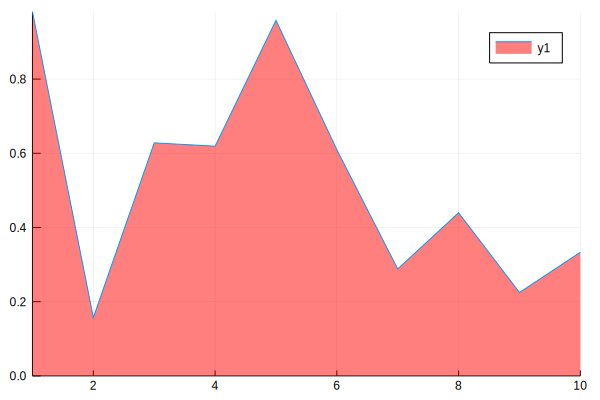

In [34]:
y = rand(10)
plot(y, fillrange = 0,  # 所画得线与哪条线之间填充
        fillalpha = 0.5,  # 透明度
        fillcolor = :red) # 颜色

#### marker

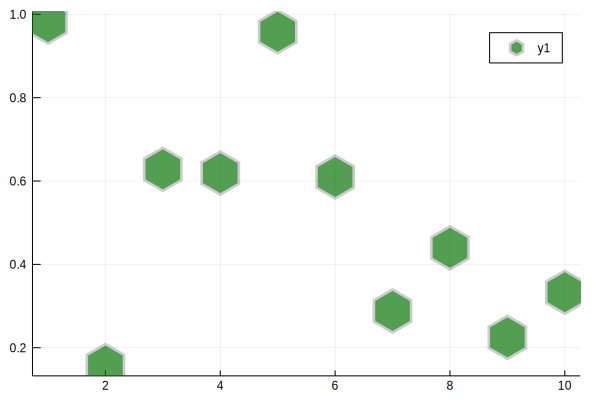

In [38]:
scatter(y, markershape = :hexagon,
           markersize = 20,
           markeralpha = 0.6,
           markercolor = :green,
           markerstrokewidth = 3,
           markerstrokealpha = 0.2,
           markerstrokecolor = :black,
           markerstrokestyle = :dot)

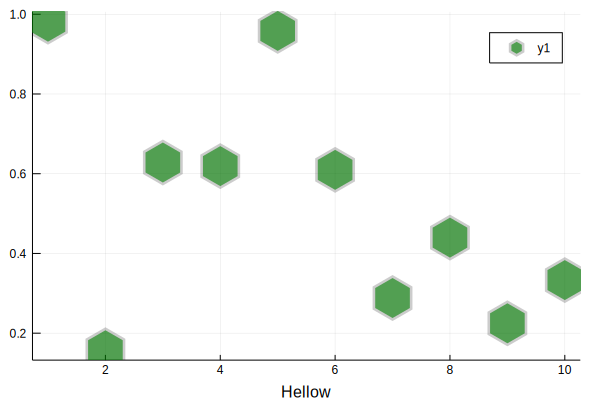

In [40]:
xlabel!("Hellow")

#### legend

In [1]:
#plot([x, y], label=["expected_accel","estimate_accel"])  # 基本格式
#plot([x, y], label=["expected_accel","estimate_accel"], legend=:top) # 设置 legend 位置
#legend=:topleft, :topright, :bottomleft,... 

### backend

安装对应的package，例如
```julia
Pkg.add("GR")
```
选择 backend 的时候，只需要
```julia
gr()
```

### save figure

In [41]:
#savefig("myplot.png") # Saves the CURRENT_PLOT as a .png
#savefig(p,"myplot.pdf") # Saves the plot from p as a .pdf vector graphic

### subplot

一种产生多个子图的方式是用 layout，将原本可以重叠在一个图中的曲线分布在多个子图中

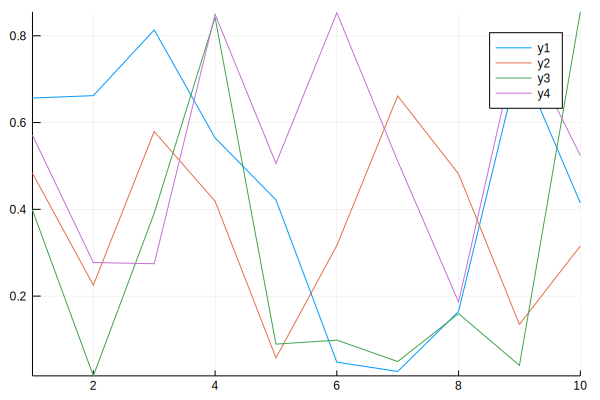

In [42]:
y = rand(10,4)
plot(x,y)

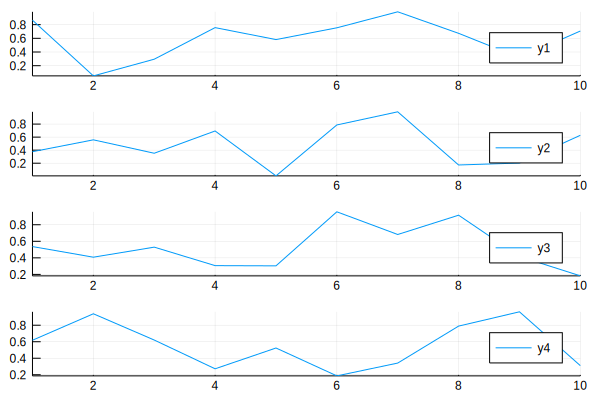

In [43]:
y = rand(10,4)
plot(x,y,layout=(4,1))  # 用 layout 可以把曲线放在多个子图中

另一种方式是先画好每一个子图，保存在变量中，然后整合成一个，也是用到 layout

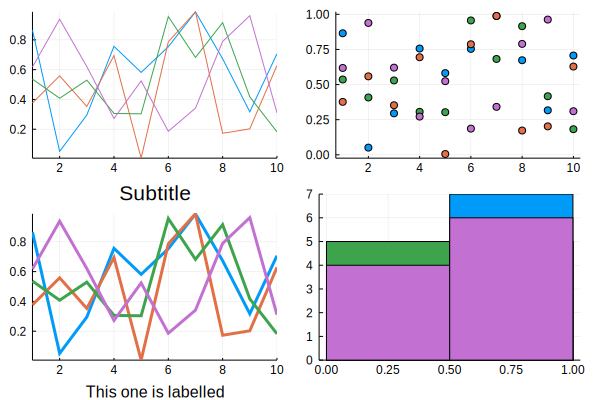

In [44]:
p1 = plot(x,y) # Make a line plot
p2 = scatter(x,y) # Make a scatter plot
p3 = plot(x,y,xlabel="This one is labelled",lw=3,title="Subtitle")
p4 = histogram(x,y) 
plot(p1,p2,p3,p4,layout=(2,2),legend=false)

每个子图中的设置只影响该子图，最后的 plot 设置影响所有子图。